# Visualizando sinal vs. ruído + Limiar

## Alexandre Caldeira - 05/08 16:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

In [5]:
nSim = 5*10**4

energiaRuido = 0.99

alpha = 5/100

sinal = np.zeros((nSim,))
ruido = energiaRuido*rd.randn(nSim,)

listaSNRs = np.arange(-20,16,1)
probDetec = np.zeros((len(listaSNRs),1))

limiar = np.quantile(ruido, 1-alpha)
print('Limiar:', limiar)

# Simulação MC:
print('Simulando')
for i, SNRi in enumerate(listaSNRs):
    amplitude = 10**((SNRi/20)*(energiaRuido**2))

    for sim in range(0,nSim):
        sinal[sim] = energiaRuido*rd.randn(1) + amplitude

    probDetec[i] = np.mean(sinal>limiar)


print('Pronto')

Limiar: 1.6253590678302132
Simulando
Pronto


In [ ]:
print(len(sinal))

50000


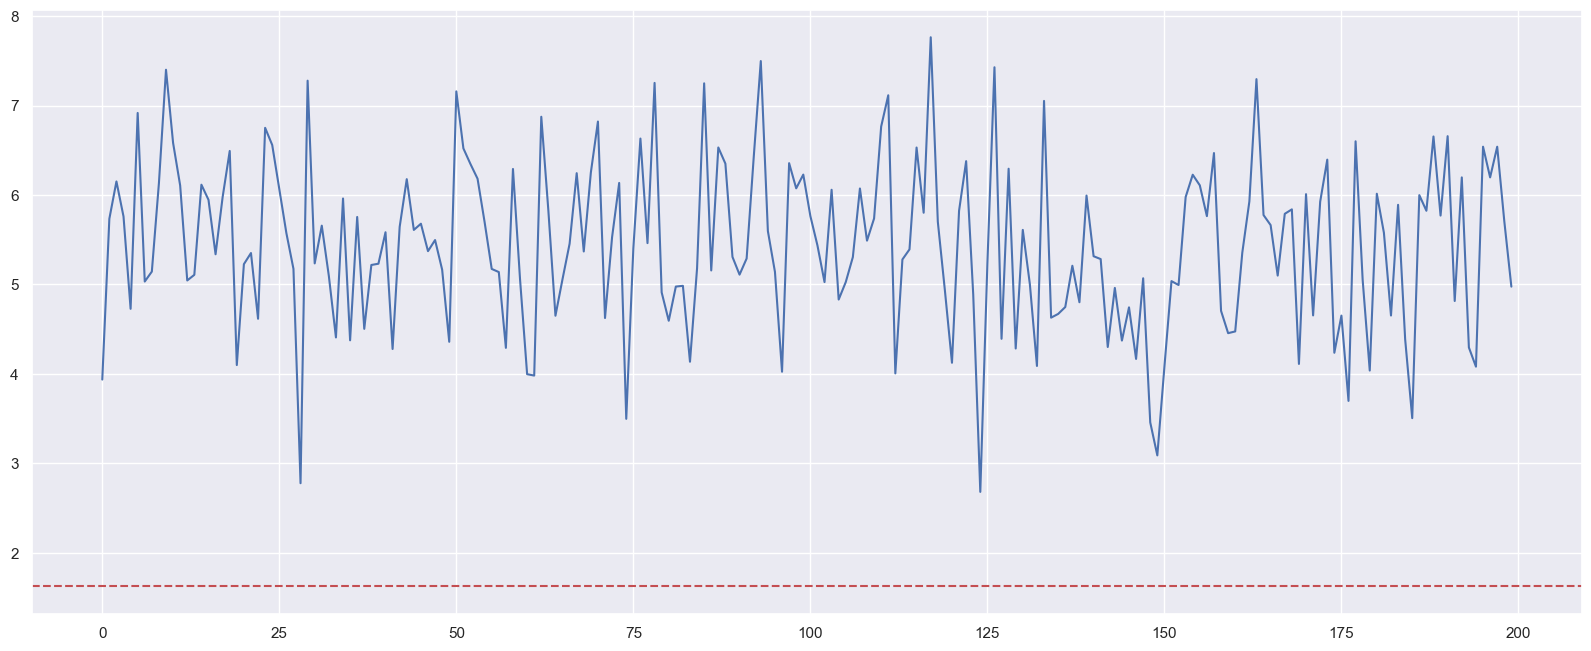

In [6]:
sns.lineplot(data = sinal[20000:20200]);
# sns.lineplot(data = limiar)
plt.axhline(limiar, 0,1,c='r',linestyle='--')